In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K9Dos48LEwiax5nuTBvS")
project = rf.workspace("screwdriver-ppgfy").project("screwdriver-mws6q")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to screwdriver-1 in yolov11:: 100%|██████████| 98/98 [00:00<00:00, 3855.53it/s]


In [31]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/screwdriver-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

In [33]:
!ls runs/detect/train3/

args.yaml					    P_curve.png		train_batch141.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch142.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1730095717.41e2ca90b0f7.8836.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch140.jpg	weights


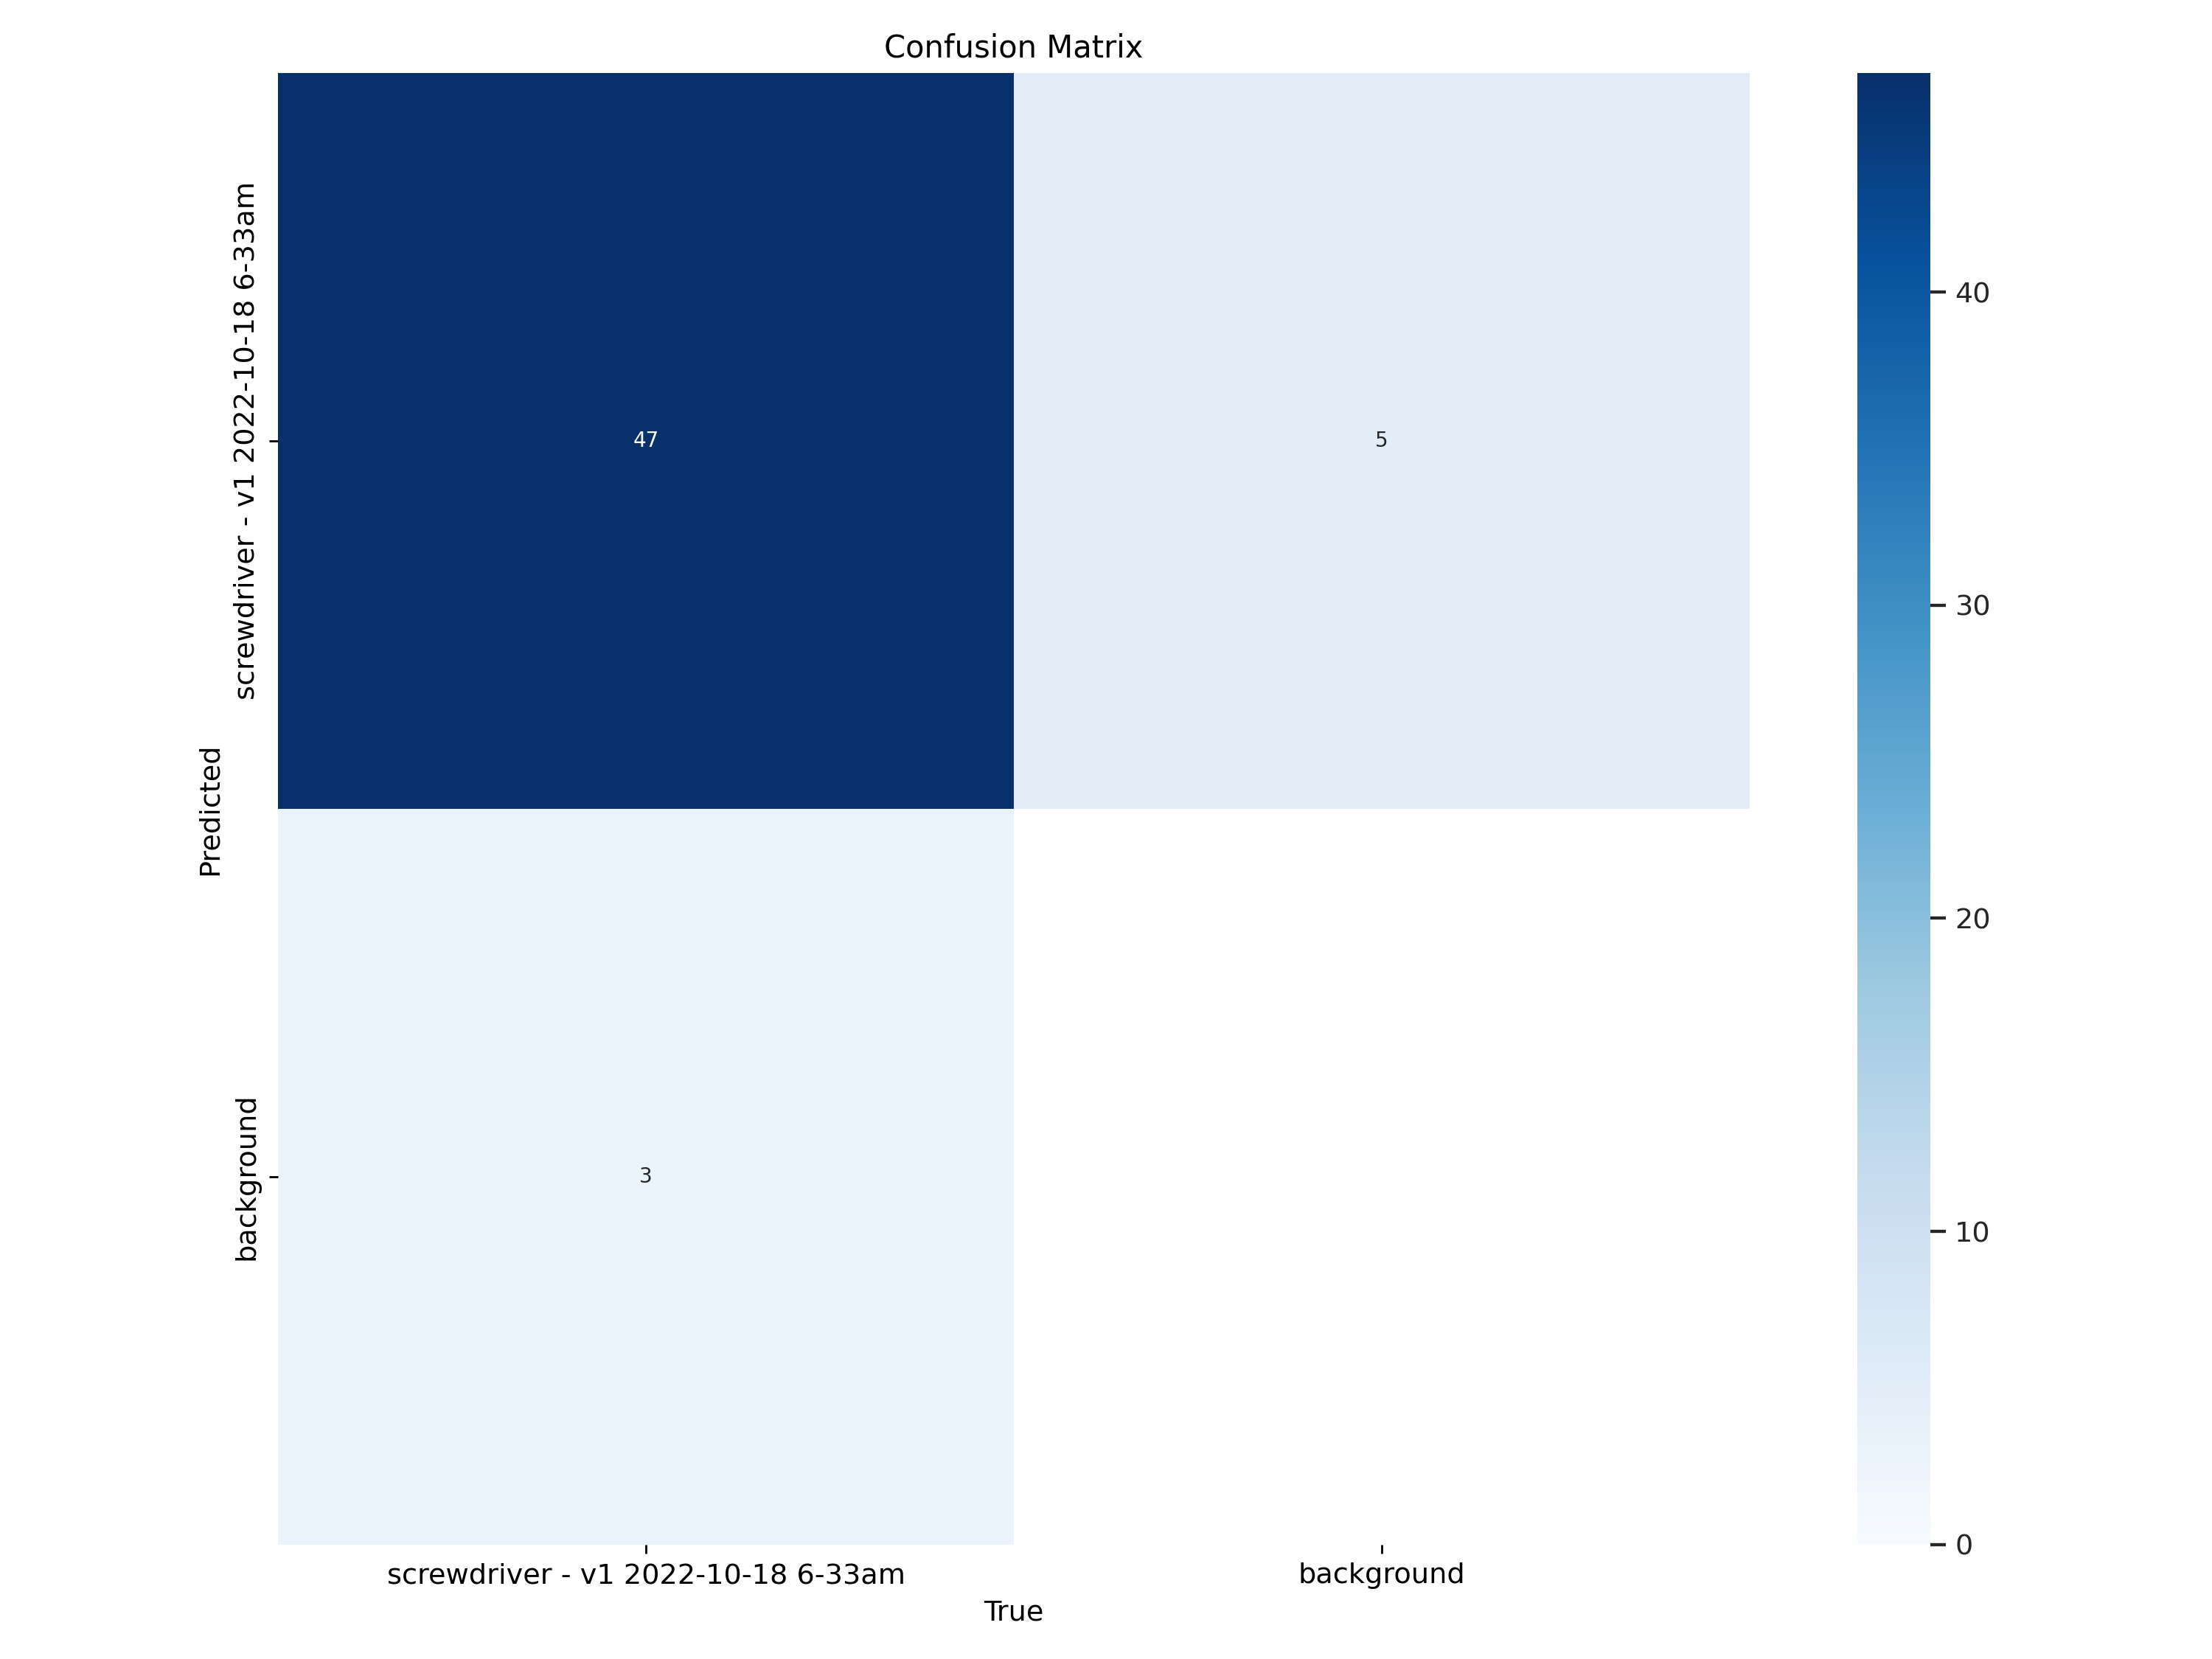

In [34]:
Image(filename=f'runs/detect/train3/confusion_matrix.png', width=600)

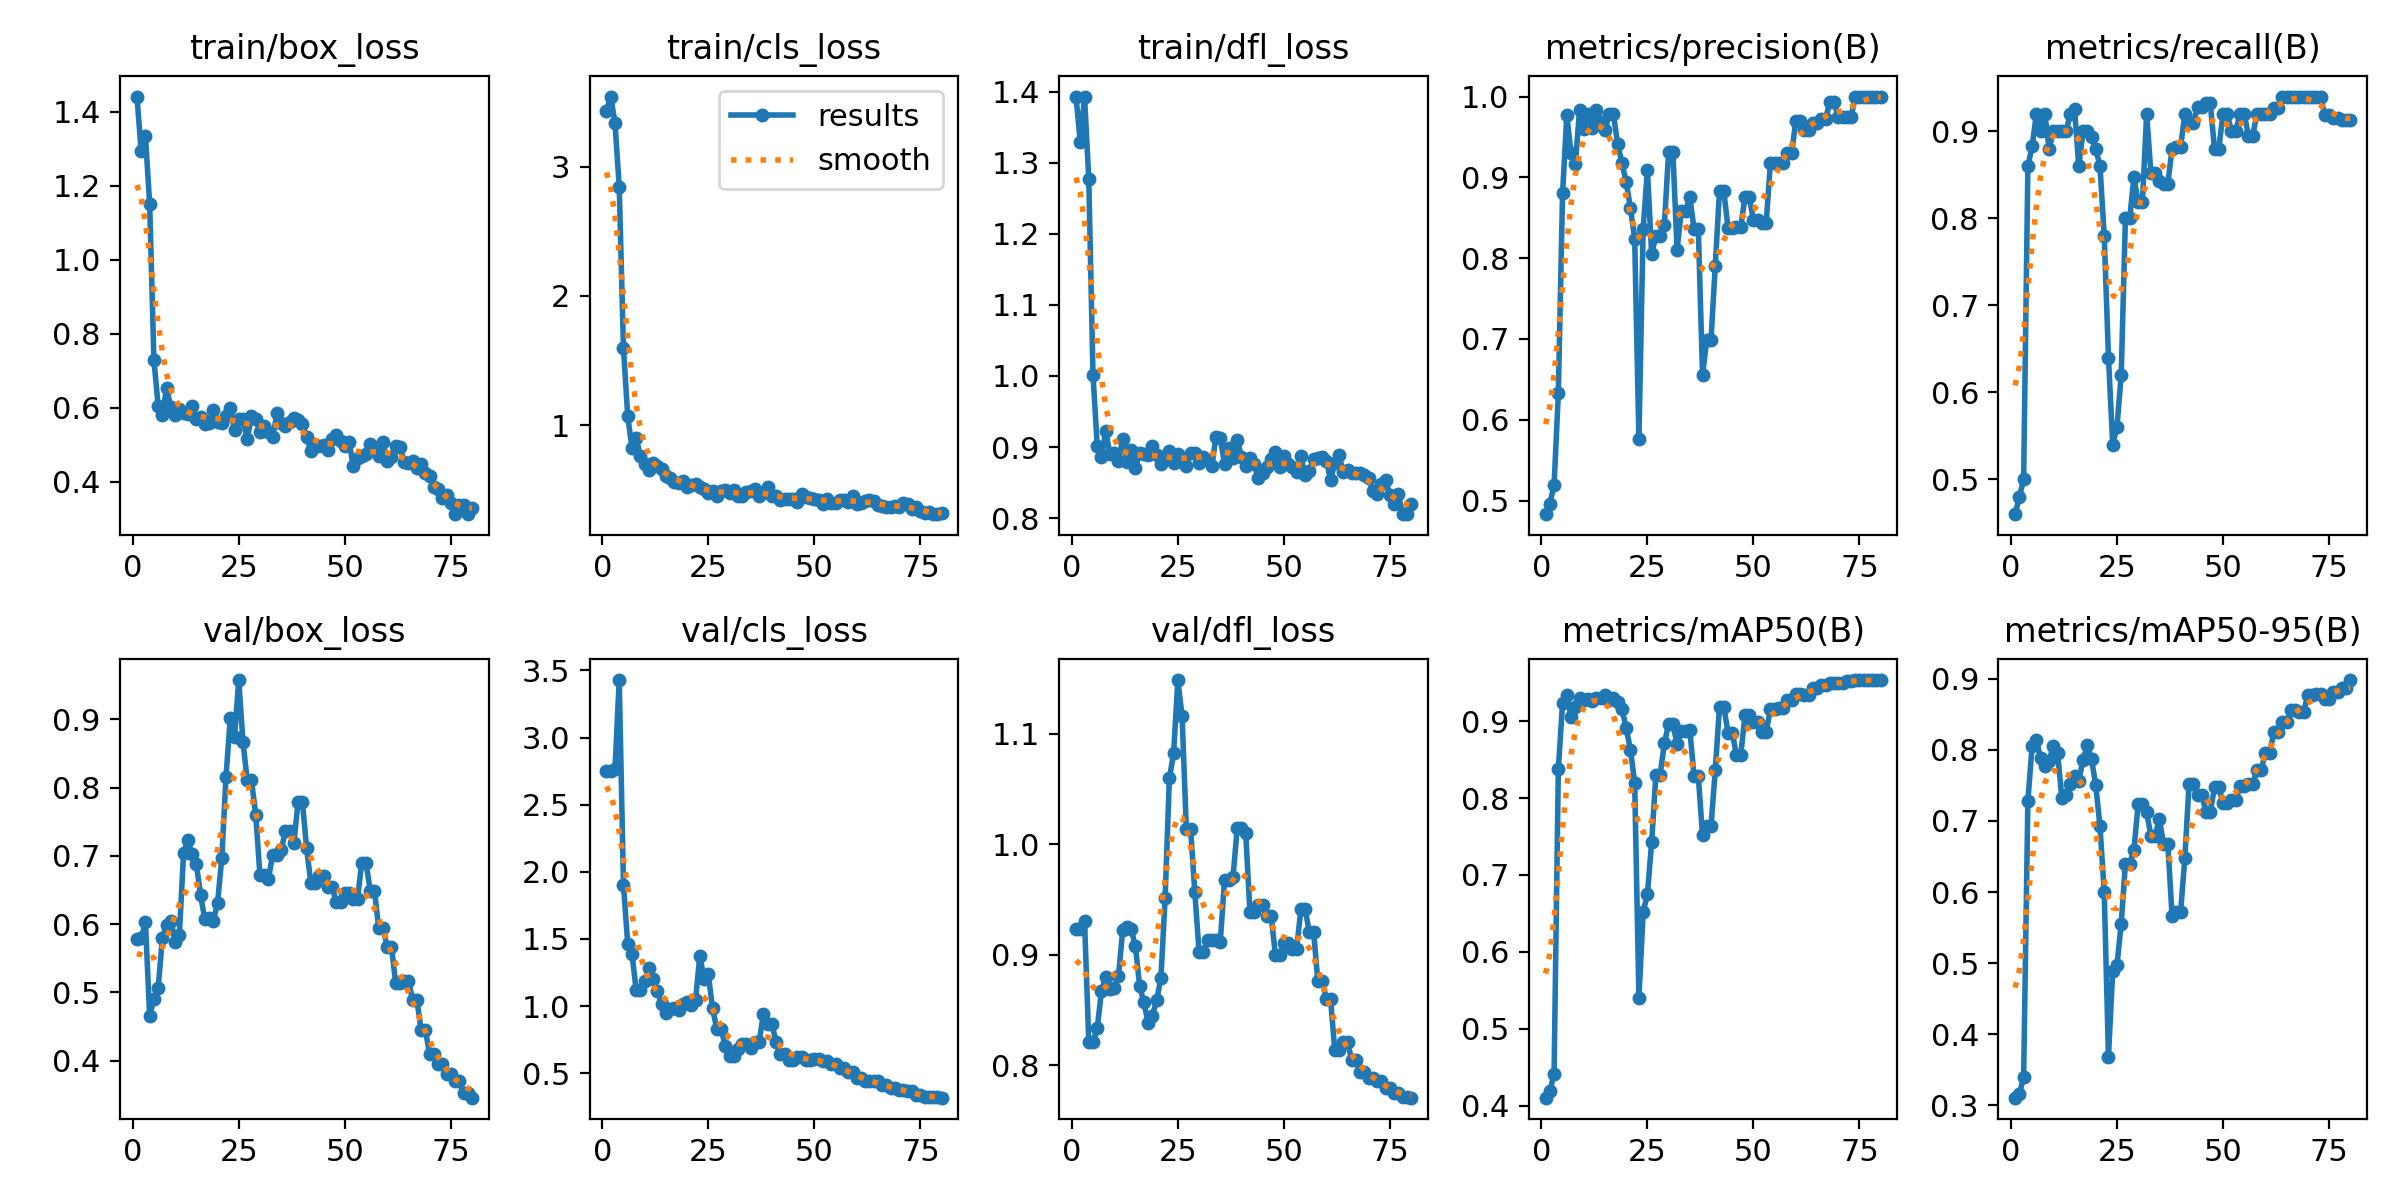

In [35]:
Image(filename=f'runs/detect/train3/results.png', width=600)

In [36]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/4 /content/screwdriver-1/test/images/IMG_20210731_161836_jpg.rf.07160670430f2c1174332b2194c3f865.jpg: 640x640 7 screwdriver - v1 2022-10-18 6-33ams, 23.6ms
image 2/4 /content/screwdriver-1/test/images/IMG_20210731_162007_jpg.rf.60fe7216a7a8847ffe2826a4183cfe8e.jpg: 640x640 6 screwdriver - v1 2022-10-18 6-33ams, 15.6ms
image 3/4 /content/screwdriver-1/test/images/IMG_20210731_162027_jpg.rf.2c889b630dbdcf68c710a4d6d4dde3cf.jpg: 640x640 4 screwdriver - v1 2022-10-18 6-33ams, 15.6ms
image 4/4 /content/screwdriver-1/test/images/IMG_20210731_162235_jpg.rf.bc6fa47d09b88267541804a8bc5573ba.jpg: 640x640 7 screwdriver - v1 2022-10-18 6-33ams, 15.5ms
Speed: 2.0ms preprocess, 17.6ms inference, 185.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.

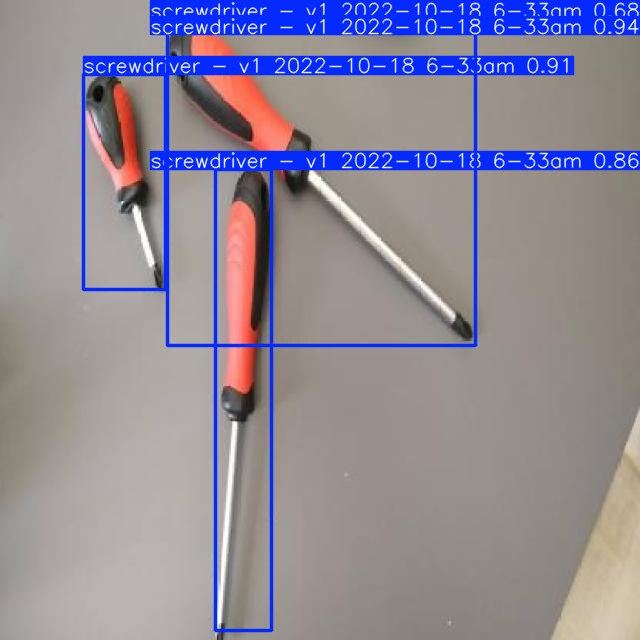

In [37]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:1]:
    display(IPyImage(filename=img, width=600))
    print("\n")